<a href="https://colab.research.google.com/github/OAjames/Predicting_customer_purchase_behavior/blob/main/Instacart_(Customer_Behaviour).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Join all dataset, what the customer will buy next, yes/no based on prior orders bought,

## Install Kaggle API


In [2]:
get_ipython().system('pip install kaggle')

In [3]:
get_ipython().system('mkdir -p ~/.kaggle')
get_ipython().system('mv kaggle.json ~/.kaggle/')
get_ipython().system('chmod 600 ~/.kaggle/kaggle.json')
print("Kaggle API key moved and permissions set.")

mv: cannot stat 'kaggle.json': No such file or directory
Kaggle API key moved and permissions set.


## Download Dataset
Download the 'instacart-market-basket-analysis' dataset from Kaggle using the Kaggle API.


In [4]:
get_ipython().system('kaggle datasets download -d psparks/instacart-market-basket-analysis --unzip')

Dataset URL: https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis
License(s): CC0-1.0
 93% 184M/197M [00:00<00:00, 450MB/s] 
100% 197M/197M [00:00<00:00, 455MB/s]


With the dataset downloaded and unzipped, the next step is to load a sample file into a pandas DataFrame and display its head to confirm that the dataset is ready for analysis.



In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [6]:
def optimize_dataframe_memory(df):
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f'Memory usage of dataframe before optimization: {start_mem:.2f} MB')

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            if str(col_type)[:3] == 'int':
                c_min = df[col].min()
                c_max = df[col].max()
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
            elif str(col_type)[:5] == 'float':
                df[col] = df[col].astype(np.float32) # Downcast floats to float32
        else:
            # Convert object columns to category if they have low cardinality
            if df[col].nunique() / len(df[col]) < 0.5:
                df[col] = df[col].astype('category')

    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f'Memory usage of dataframe after optimization: {end_mem:.2f} MB')
    print(f'Reduced by {(1 - end_mem / start_mem) * 100:.2f}%')
    return df

print("Memory optimization function defined.")

Memory optimization function defined.


## List Dataset Files

List the contents of the directory where the dataset was unzipped to verify that all the expected data files are present and accessible.


In [7]:
get_ipython().system('ls -F')
print("Listed contents of the current directory.")

aisles.csv	 order_products__prior.csv  orders.csv	  sample_data/
departments.csv  order_products__train.csv  products.csv
Listed contents of the current directory.


### Step 1
*   A sample file, `orders.csv`, was loaded into a pandas DataFrame, and its first few rows were displayed, confirming data accessibility and readiness.
*   Verification of the directory contents confirmed that all expected dataset files, including `aisles.csv`, `departments.csv`, `order_products__prior.csv`, `order_products__train.csv`, `orders.csv`, and `products.csv`, were present.

### Next Steps
*   The next logical step would be to load other relevant `.csv` files into DataFrames and start merging or inspecting them to understand the data structure and content.


## Load Dataset
Loading the dataset into pandas dataframe and data exploratory


In [8]:
import pandas as pd

# Load a sample file into a pandas DataFrame
orders_df = pd.read_csv('orders.csv')

# Display the first few rows of the DataFrame to confirm loading
print("DataFrame loaded successfully. Displaying head:")
orders_df.head(10)

DataFrame loaded successfully. Displaying head:


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [9]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [10]:
# Loading files into pandas DataFrame
aisles_df = pd.read_csv('aisles.csv')
departments_df = pd.read_csv('departments.csv')
products_df = pd.read_csv('products.csv')
order_products_prior_df = pd.read_csv('order_products__prior.csv')
order_products_train_df = pd.read_csv('order_products__train.csv')

In [11]:
aisles_df.head(5)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [12]:
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [13]:
products_df.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [14]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [15]:
print(f"✓ Aisles: {aisles_df.shape}")
print(f"✓ Departments: {departments_df.shape}")
print(f"✓ Products: {products_df.shape}")
print(f"✓ Orders: {orders_df.shape}")
print(f"✓ Order Products (Prior): {order_products_prior_df.shape}")
print(f"✓ Order Products (Train): {order_products_train_df.shape}")

✓ Aisles: (134, 2)
✓ Departments: (21, 2)
✓ Products: (49688, 4)
✓ Orders: (3421083, 7)
✓ Order Products (Prior): (32434489, 4)
✓ Order Products (Train): (1384617, 4)


In [16]:
print('\n--- departments_df.info() ---')
departments_df.info()


--- departments_df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [17]:
print('\n--- order_products_prior_df.info() ---')
order_products_prior_df.info()


--- order_products_prior_df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [18]:
print('\n--- order_products_train_df.info() ---')
order_products_train_df.info()


--- order_products_train_df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


### EXPLORE THE DATA STRUCTURE
Exploring the orders, orders_product_prior and products dataset structure

In [19]:
print("\nOrders Dataset Sample:")
print(orders_df.head())
print(f"\nEval Set Distribution:")
print(orders_df['eval_set'].value_counts())

print("\nOrder Products (Prior) Sample:")
print(order_products_prior_df.head())

print("\nProducts Dataset Sample:")
print(products_df.head())


Orders Dataset Sample:
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  

Eval Set Distribution:
eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64

Order Products (Prior) Sample:
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  

In [20]:
print("Optimizing aisles_df...")
aisles_df = optimize_dataframe_memory(aisles_df.copy())

print("\nOptimizing departments_df...")
departments_df = optimize_dataframe_memory(departments_df.copy())

print("\nOptimizing products_df...")
products_df = optimize_dataframe_memory(products_df.copy())

print("\nOptimizing orders_df...")
orders_df = optimize_dataframe_memory(orders_df.copy())

print("\nOptimizing order_products_prior_df...")
order_products_prior_df = optimize_dataframe_memory(order_products_prior_df.copy())

print("\nOptimizing order_products_train_df...")
order_products_train_df = optimize_dataframe_memory(order_products_train_df.copy())

print("\nAll base DataFrames optimized.")

Optimizing aisles_df...
Memory usage of dataframe before optimization: 0.01 MB
Memory usage of dataframe after optimization: 0.01 MB
Reduced by 8.21%

Optimizing departments_df...
Memory usage of dataframe before optimization: 0.00 MB
Memory usage of dataframe after optimization: 0.00 MB
Reduced by 9.81%

Optimizing products_df...
Memory usage of dataframe before optimization: 4.94 MB
Memory usage of dataframe after optimization: 4.14 MB
Reduced by 16.30%

Optimizing orders_df...
Memory usage of dataframe before optimization: 332.71 MB
Memory usage of dataframe after optimization: 52.20 MB
Reduced by 84.31%

Optimizing order_products_prior_df...
Memory usage of dataframe before optimization: 989.82 MB
Memory usage of dataframe after optimization: 340.25 MB
Reduced by 65.62%

Optimizing order_products_train_df...
Memory usage of dataframe before optimization: 42.26 MB
Memory usage of dataframe after optimization: 13.20 MB
Reduced by 68.75%

All base DataFrames optimized.


### STEP 3: FILTER FOR PRIOR ORDERS AND MERGE PRODUCT INFORMATION

In [21]:
# Filter orders for 'prior' eval_set
prior_orders = orders_df[orders_df['eval_set'] == 'prior'].copy()
print(f"\nPrior orders: {prior_orders.shape[0]:,} orders")
print(f"Unique customers in prior: {prior_orders['user_id'].nunique():,}")


Prior orders: 3,214,874 orders
Unique customers in prior: 206,209


In [22]:
# Merge order_products_prior with prior_orders to get order details
prior_orders_detail = order_products_prior_df.merge(
    prior_orders,
    on='order_id',
    how='left'
)
print(f"\nPrior orders detail (after merge): {prior_orders_detail.shape}")



Prior orders detail (after merge): (32434489, 10)


In [23]:
# Merge with products to get product information
prior_orders_detail = prior_orders_detail.merge(
    products_df,
    on='product_id',
    how='left'
)

# Merge with aisles
prior_orders_detail = prior_orders_detail.merge(
    aisles_df,
    on='aisle_id',
    how='left'
)

In [24]:
# Merge with departments
prior_orders_detail = prior_orders_detail.merge(
    departments_df, # Corrected from 'departments' to 'departments_df'
    on='department_id',
    how='left'
)

print("prior_orders_detail merged with departments_df successfully.")
print(f"Shape of prior_orders_detail after merging with departments_df: {prior_orders_detail.shape}")

prior_orders_detail merged with departments_df successfully.
Shape of prior_orders_detail after merging with departments_df: (32434489, 15)


In [25]:
print(f"\nFully merged prior orders: {prior_orders_detail.shape}")
print(f"\nColumns in merged dataset:")
print(prior_orders_detail.columns.tolist())


Fully merged prior orders: (32434489, 15)

Columns in merged dataset:
['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_name', 'aisle_id', 'department_id', 'aisle', 'department']


### RECENCY FEATURES APPROACH:
Recency measures how recently a customer purchased a product or made an order.
Key insights:
- Recent purchases are stronger signals for future purchases
- 'days_since_prior_order' tells us the gap between consecutive orders
- We'll create features at both USER and USER-PRODUCT levels

In [26]:
# User-Level Recency Features

# Calculate cumulative days since first order for each user
user_order_timeline = prior_orders_detail.groupby(['user_id', 'order_id']).agg({
    'order_number': 'first',
    'days_since_prior_order': 'first'
}).reset_index()

# Sort by user and order number
user_order_timeline = user_order_timeline.sort_values(['user_id', 'order_number'])

# Calculate cumulative days from first order
user_order_timeline['cumulative_days'] = user_order_timeline.groupby('user_id')['days_since_prior_order'].cumsum()
user_order_timeline['cumulative_days'] = user_order_timeline['cumulative_days'].fillna(0)

print(f"User order timeline created: {user_order_timeline.shape}")
print("\nSample of user order timeline:")
print(user_order_timeline.head(10))


User order timeline created: (3214874, 5)

Sample of user order timeline:
   user_id  order_id  order_number  days_since_prior_order  cumulative_days
6        1   2539329             1                     NaN              0.0
5        1   2398795             2                    15.0             15.0
1        1    473747             3                    21.0             36.0
3        1   2254736             4                    29.0             65.0
0        1    431534             5                    28.0             93.0
9        1   3367565             6                    19.0            112.0
2        1    550135             7                    20.0            132.0
8        1   3108588             8                    14.0            146.0
4        1   2295261             9                     0.0            146.0
7        1   2550362            10                    30.0            176.0


In [27]:
# Product-Level Recency Features

# Merge cumulative days back to main dataset
prior_orders_detail = prior_orders_detail.merge(
    user_order_timeline[['user_id', 'order_id', 'cumulative_days']],
    on=['user_id', 'order_id'],
    how='left'
)

# For each user-product pair, calculate:
# - Last time the product was purchased (days from first order)
# - Days since last purchase of that product

user_product_recency = prior_orders_detail.groupby(['user_id', 'product_id']).agg({
    'cumulative_days': 'max',  # Last time product was purchased
    'order_id': 'count'  # Number of times purchased
}).reset_index()

user_product_recency.columns = ['user_id', 'product_id', 'last_purchase_day', 'product_purchase_count']

print(f"User-product recency features: {user_product_recency.shape}")
print("\nSample of user-product recency:")
print(user_product_recency.head(10))


User-product recency features: (13307953, 4)

Sample of user-product recency:
   user_id  product_id  last_purchase_day  product_purchase_count
0        1         196              176.0                      10
1        1       10258              176.0                       9
2        1       10326               93.0                       1
3        1       12427              176.0                      10
4        1       13032              176.0                       3
5        1       13176               93.0                       2
6        1       14084                0.0                       1
7        1       17122               93.0                       1
8        1       25133              176.0                       8
9        1       26088               15.0                       2


In [28]:
# Calculate days since last purchase for each product

# Get the maximum cumulative days for each user (their latest order time)
user_max_days = prior_orders_detail.groupby('user_id')['cumulative_days'].max().reset_index()
user_max_days.columns = ['user_id', 'user_latest_order_day']

# Merge with user-product recency
user_product_recency = user_product_recency.merge(
    user_max_days,
    on='user_id',
    how='left'
)

# Calculate days since last purchase
user_product_recency['days_since_last_purchase'] = (
    user_product_recency['user_latest_order_day'] - user_product_recency['last_purchase_day']
)

print("\nRecency features with days since last purchase:")
print(user_product_recency.head(10))



Recency features with days since last purchase:
   user_id  product_id  last_purchase_day  product_purchase_count  \
0        1         196              176.0                      10   
1        1       10258              176.0                       9   
2        1       10326               93.0                       1   
3        1       12427              176.0                      10   
4        1       13032              176.0                       3   
5        1       13176               93.0                       2   
6        1       14084                0.0                       1   
7        1       17122               93.0                       1   
8        1       25133              176.0                       8   
9        1       26088               15.0                       2   

   user_latest_order_day  days_since_last_purchase  
0                  176.0                       0.0  
1                  176.0                       0.0  
2                  176.0        

In [29]:
# Create additional recency-based features
# Average days between purchases for each user-product

# Sort the DataFrame by user, product, and order number to ensure correct diff calculation
prior_orders_detail_sorted = prior_orders_detail.sort_values(by=['user_id', 'product_id', 'order_number'])

# Calculate the difference in cumulative days within each user-product group
prior_orders_detail_sorted['days_diff'] = prior_orders_detail_sorted.groupby(['user_id', 'product_id'])['cumulative_days'].diff()

# Calculate the mean of these differences
user_product_purchase_intervals = prior_orders_detail_sorted.groupby(['user_id', 'product_id'])['days_diff'].mean().reset_index()
user_product_purchase_intervals.columns = ['user_id', 'product_id', 'avg_days_between_purchases']

user_product_recency = user_product_recency.merge(
    user_product_purchase_intervals,
    on=['user_id', 'product_id'],
    how='left'
)


In [30]:
# Purchase frequency (orders per day)
user_product_recency['purchase_frequency'] = (
    user_product_recency['product_purchase_count'] /
    (user_product_recency['user_latest_order_day'] + 1)  # +1 to avoid division by zero
)

# Recency score (exponential decay - more recent = higher score)
# Products purchased recently get higher scores
user_product_recency['recency_score'] = np.exp(-user_product_recency['days_since_last_purchase'] / 30)

print("\nFinal user-product recency features:")
print(user_product_recency.head())
print(f"\nFeatures shape: {user_product_recency.shape}")


Final user-product recency features:
   user_id  product_id  last_purchase_day  product_purchase_count  \
0        1         196              176.0                      10   
1        1       10258              176.0                       9   
2        1       10326               93.0                       1   
3        1       12427              176.0                      10   
4        1       13032              176.0                       3   

   user_latest_order_day  days_since_last_purchase  \
0                  176.0                       0.0   
1                  176.0                       0.0   
2                  176.0                      83.0   
3                  176.0                       0.0   
4                  176.0                       0.0   

   avg_days_between_purchases  purchase_frequency  recency_score  
0                   19.555555            0.056497       1.000000  
1                   20.125000            0.050847       1.000000  
2                    

### CREATE USER-LEVEL AGGREGATE FEATURES
Creating user level aggregate features

In [31]:
user_features = prior_orders.groupby('user_id').agg({
    'order_number': 'max',  # Total number of orders
    'days_since_prior_order': ['mean', 'std', 'min', 'max'],  # Order frequency patterns
}).reset_index()

user_features.columns = ['user_id', 'total_orders', 'avg_order_interval',
                         'std_order_interval', 'min_order_interval', 'max_order_interval']

# Average basket size
basket_sizes = prior_orders_detail.groupby(['user_id', 'order_id']).size().reset_index(name='basket_size')
avg_basket_size = basket_sizes.groupby('user_id')['basket_size'].mean().reset_index()
avg_basket_size.columns = ['user_id', 'avg_basket_size']

user_features = user_features.merge(avg_basket_size, on='user_id', how='left')

print("\nUser-level features:")
print(user_features.head())
print(f"User features shape: {user_features.shape}")



User-level features:
   user_id  total_orders  avg_order_interval  std_order_interval  \
0        1            10           19.555555            9.395625   
1        2            14           15.230769            9.867065   
2        3            12           12.090909            5.375026   
3        4             5           13.750000            9.500000   
4        5             4           13.333333            4.932883   

   min_order_interval  max_order_interval  avg_basket_size  
0                 0.0                30.0         5.900000  
1                 3.0                30.0        13.928571  
2                 7.0                21.0         7.333333  
3                 0.0                21.0         3.600000  
4                10.0                19.0         9.250000  
User features shape: (206209, 7)


### CREATE MASTER DATASET

In [32]:
# Merge user-product recency with product information
master_dataset = user_product_recency.merge(
    products_df,
    on='product_id',
    how='left'
)

# Merge with user features
master_dataset = master_dataset.merge(
    user_features,
    on='user_id',
    how='left'
)

# Merge with aisles
master_dataset = master_dataset.merge(
    aisles_df,
    on='aisle_id',
    how='left'
)

# Merge with departments
master_dataset = master_dataset.merge(
    departments_df,
    on='department_id',
    how='left'
)

print(f"\nMaster dataset created: {master_dataset.shape}")
print(f"Total user-product combinations: {master_dataset.shape[0]:,}")
print(f"Unique users: {master_dataset['user_id'].nunique():,}")
print(f"Unique products: {master_dataset['product_id'].nunique():,}")

print("\nMaster dataset columns:")
print(master_dataset.columns.tolist())

print("\nMaster dataset sample:")
print(master_dataset.head(10))


Master dataset created: (13307953, 20)
Total user-product combinations: 13,307,953
Unique users: 206,209
Unique products: 49,677

Master dataset columns:
['user_id', 'product_id', 'last_purchase_day', 'product_purchase_count', 'user_latest_order_day', 'days_since_last_purchase', 'avg_days_between_purchases', 'purchase_frequency', 'recency_score', 'product_name', 'aisle_id', 'department_id', 'total_orders', 'avg_order_interval', 'std_order_interval', 'min_order_interval', 'max_order_interval', 'avg_basket_size', 'aisle', 'department']

Master dataset sample:
   user_id  product_id  last_purchase_day  product_purchase_count  \
0        1         196              176.0                      10   
1        1       10258              176.0                       9   
2        1       10326               93.0                       1   
3        1       12427              176.0                      10   
4        1       13032              176.0                       3   
5        1       1317

### SAVE MASTER DATASET


In [33]:

master_dataset.to_csv('instacart_master_dataset.csv', index=False)
print("✓ Master dataset saved as 'instacart_master_dataset.csv'")

# Save user features separately
user_features.to_csv('user_features.csv', index=False)
print("✓ User features saved as 'user_features.csv'")

# Save recency features separately
user_product_recency.to_csv('user_product_recency.csv', index=False)
print("✓ Recency features saved as 'user_product_recency.csv'")



✓ Master dataset saved as 'instacart_master_dataset.csv'
✓ User features saved as 'user_features.csv'
✓ Recency features saved as 'user_product_recency.csv'


### BASIC EXPLORATORY ANALYSIS ON RECENCY FEATURES


In [34]:
print("\nRecency Features Summary Statistics:")
print(master_dataset[['days_since_last_purchase', 'avg_days_between_purchases',
                      'purchase_frequency', 'recency_score', 'product_purchase_count']].describe())

# Distribution of days since last purchase
print("\nDays Since Last Purchase Distribution:")
print(master_dataset['days_since_last_purchase'].value_counts().head(10))

# Products with highest recency scores (most recently purchased)
print("\nTop 10 Products with Highest Recency Scores:")
top_recency = master_dataset.nlargest(10, 'recency_score')[
    ['user_id', 'product_name', 'days_since_last_purchase', 'recency_score', 'product_purchase_count']
]
print(top_recency)



Recency Features Summary Statistics:
       days_since_last_purchase  avg_days_between_purchases  \
count              1.330795e+07                5.325258e+06   
mean               8.358693e+01                4.267751e+01   
std                8.594868e+01                4.281780e+01   
min                0.000000e+00                0.000000e+00   
25%                1.400000e+01                1.600000e+01   
50%                5.500000e+01                2.950000e+01   
75%                1.300000e+02                5.300000e+01   
max                3.650000e+02                3.650000e+02   

       purchase_frequency  recency_score  product_purchase_count  
count        1.330795e+07   1.330795e+07            1.330795e+07  
mean         1.518798e-02   3.367760e-01            2.437226e+00  
std          2.191765e-02   3.808903e-01            3.554528e+00  
min          2.732240e-03   5.200962e-06            1.000000e+00  
25%          4.347826e-03   1.312373e-02            1.00000

✓ Visualization saved as 'recency_features_visualization.png'


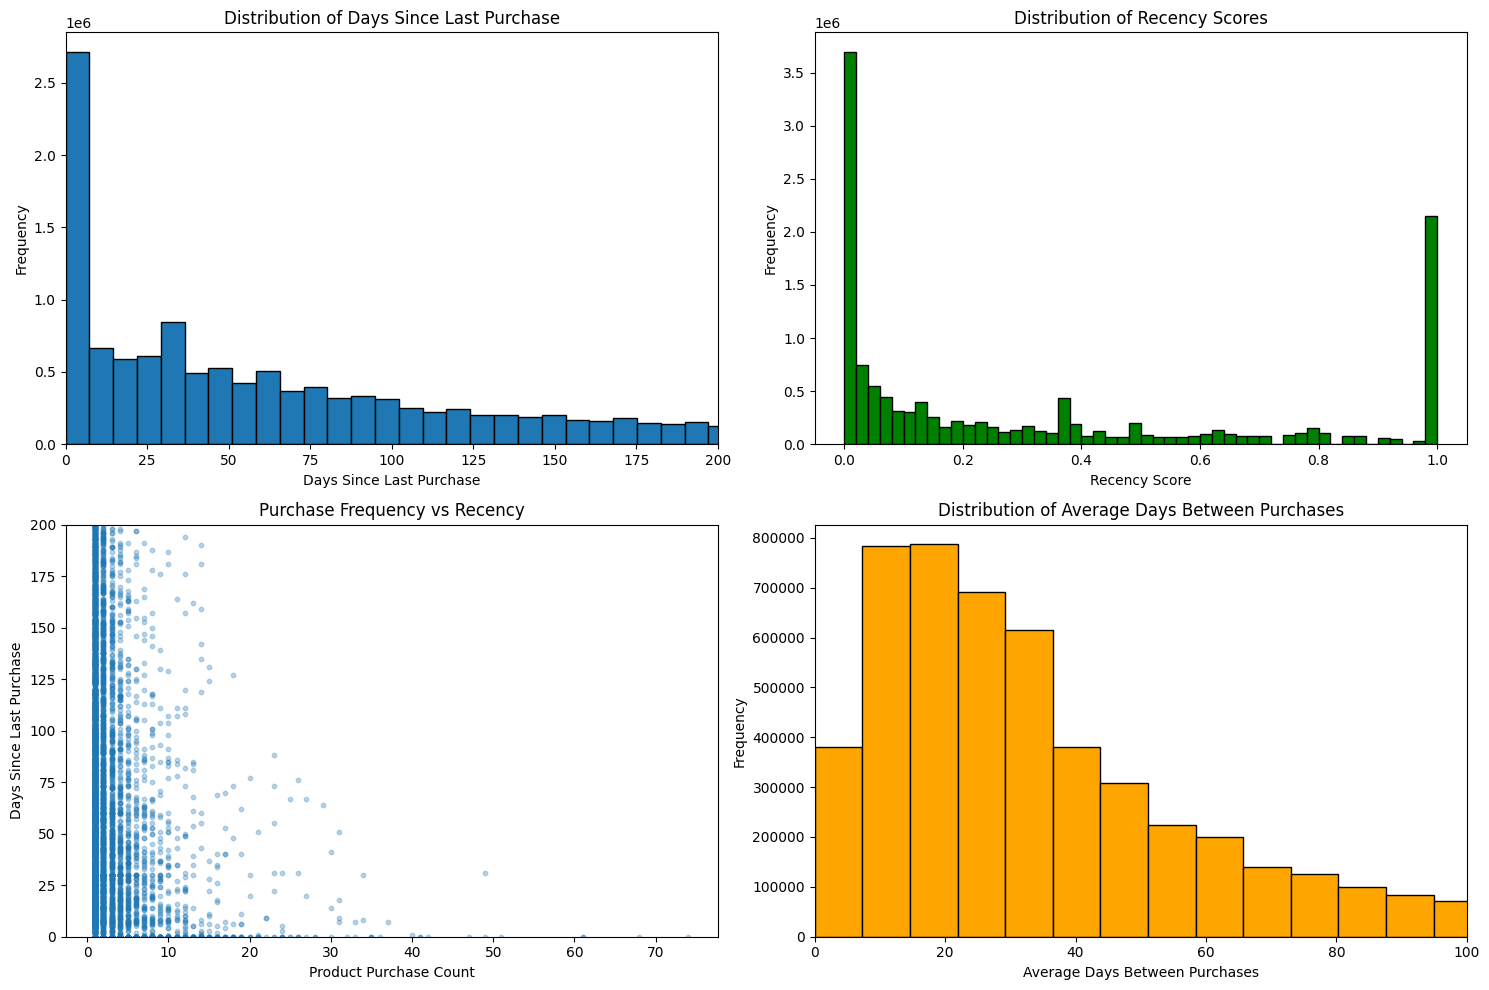

In [35]:
try:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot 1: Distribution of days since last purchase
    axes[0, 0].hist(master_dataset['days_since_last_purchase'].dropna(), bins=50, edgecolor='black')
    axes[0, 0].set_xlabel('Days Since Last Purchase')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Distribution of Days Since Last Purchase')
    axes[0, 0].set_xlim(0, 200)

    # Plot 2: Recency score distribution
    axes[0, 1].hist(master_dataset['recency_score'].dropna(), bins=50, edgecolor='black', color='green')
    axes[0, 1].set_xlabel('Recency Score')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Distribution of Recency Scores')

    # Plot 3: Purchase count vs days since last purchase
    sample_data = master_dataset.sample(min(10000, len(master_dataset)))
    axes[1, 0].scatter(sample_data['product_purchase_count'],
                      sample_data['days_since_last_purchase'],
                      alpha=0.3, s=10)
    axes[1, 0].set_xlabel('Product Purchase Count')
    axes[1, 0].set_ylabel('Days Since Last Purchase')
    axes[1, 0].set_title('Purchase Frequency vs Recency')
    axes[1, 0].set_ylim(0, 200)

    # Plot 4: Average days between purchases
    axes[1, 1].hist(master_dataset['avg_days_between_purchases'].dropna(),
                   bins=50, edgecolor='black', color='orange')
    axes[1, 1].set_xlabel('Average Days Between Purchases')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Distribution of Average Days Between Purchases')
    axes[1, 1].set_xlim(0, 100)

    plt.tight_layout()
    plt.savefig('recency_features_visualization.png', dpi=300, bbox_inches='tight')
    print("✓ Visualization saved as 'recency_features_visualization.png'")

except Exception as e:
    print(f"Note: Could not create visualization. Error: {e}")
